In [1]:
import numpy as np
import matplotlib.pyplot as plt
from models.vibrating_string import Vibrating_string
from models.diffusion_equation import SimulationGrid
from models.methods import gauss_seidel, sor, jacobi

# Set 1

## 1.1 Vibrating string

### A: Discretization

A. (0.5 point) Discretize the wave equation, and write it in a form suitable for
implementing in a computer program. Assume that the boundaries are fixed, Ψ(x =
0, t) = 0, Ψ(x = L, t) = 0. L is the length of the string. Take L = 1 for simplicity.
Divide the string in N intervals, so that the interval length is ∆x = L/N . Also
consider the boundary cases.

### B: Plots

B. (1 point) Implement the time stepping. Determine the time development of
the string, with the following initial conditions. The string is at rest at t = 0, i.e.
Ψ′(x, t = 0) = 0.
i. Ψ(x, t = 0) = sin(2πx).
ii. Ψ(x, t = 0) = sin(5πx).
iii. Ψ(x, t = 0) = sin(5πx) if 1/5 < x < 2/5, else Ψ = 0.
Take c = 1 and use the time step ∆t = 0.001. Plot the result at several times in
the same ﬁgure, e.g. varying the color of the curve

#### $sin(2 \cdot \pi \cdot x)$

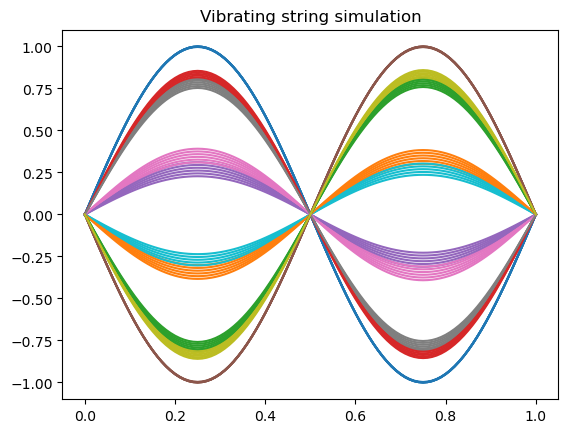

In [2]:
string = Vibrating_string(mode = 1,N = 100,T = 100)
string.plotter(1700)

#### $sin(5 \cdot \pi \cdot x)$

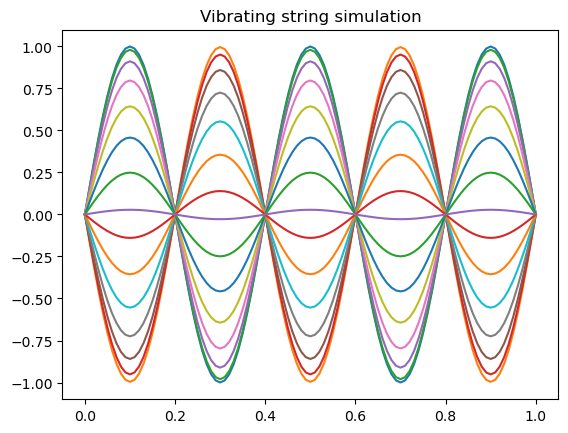

In [3]:
string = Vibrating_string(mode = 2,N = 100,T = 100)
string.plotter(7000)

#### $sin(5 \cdot \pi \cdot x)$ if $1/5 <x<2/5$

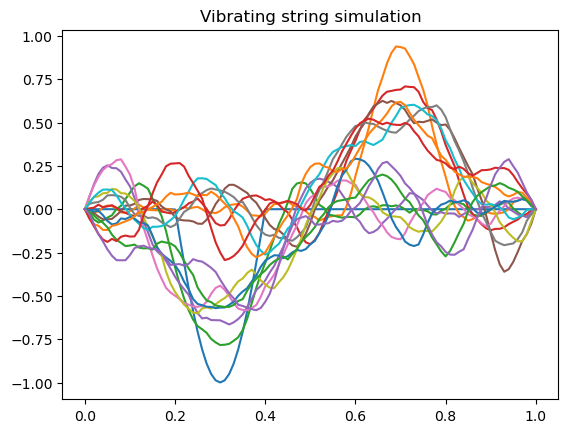

In [4]:
string = Vibrating_string(mode = 3,N = 100,T = 100)
string.plotter(7000)

### C: Animated plots

C. (1 point) Make an animated plot of the time development. This can be done
from within matplotlib, 

#### $sin(2 \cdot \pi \cdot x)$

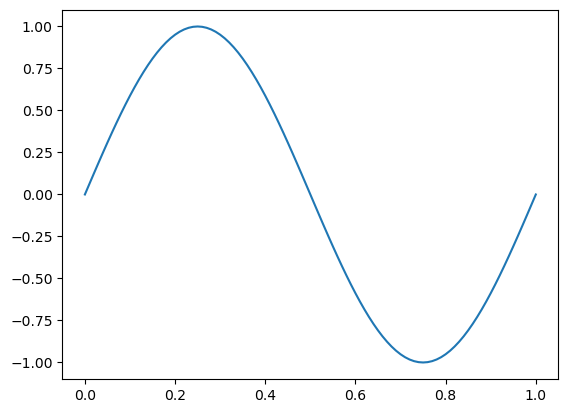

C:\Users\Aleks\AppData\Local\anaconda3\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [5]:
string = Vibrating_string(mode = 1,N = 100,T = 100)
string.animation()

#### $sin(5 \cdot \pi \cdot x)$

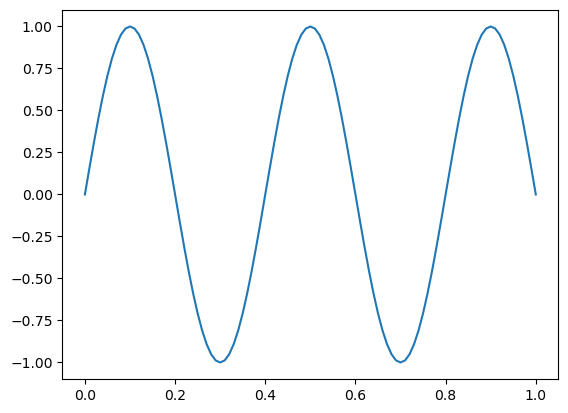

In [6]:
string = Vibrating_string(mode = 2,N = 100,T = 100)
string.animation()

#### $sin(2 \cdot \pi \cdot x)$ if $1/5 < x < 2/5$

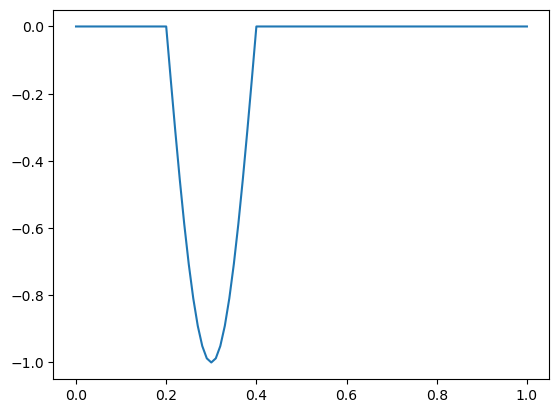

In [7]:
string = Vibrating_string(mode = 3,N = 100,T = 100)
string.animation()

## 1.2. The Time Dependent Diffusion Equation

### D

D. (0.5 point) Determine the equation to use at the boundaries of the domain.
Clearly show the ranges of the indices of the grid. A ﬁgure is extremely helpful for
ﬁguring this out

------

### E


E. (1 point) Test the correctness of your simulation. Compare to the analytic
solutions, plot c(y) for diﬀerent times. The analytic solution i

In [8]:
dif = SimulationGrid(50)

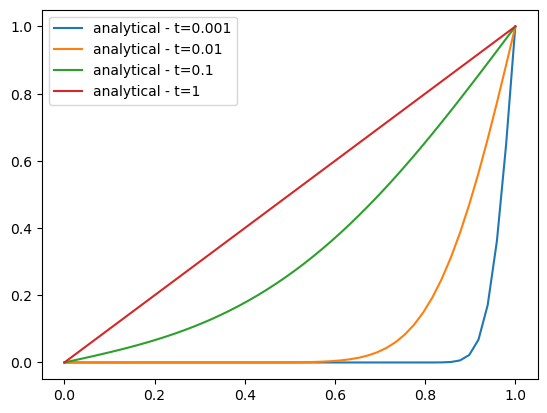

In [9]:
y_input = np.linspace(0,1,50)
time_show = [0.001, 0.01, 0.1, 1] 

for t in time_show:
    result = dif.c_analytical(t)
    text = f"analytical - t={t}"
    plt.plot(y_input,result,label=text)
    plt.legend()
plt.show()

c:\Users\joann\anaconda3\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\joann\OneDrive\Escritorio\Intro\Scientific-Computing\models\diffusion_equation.py:79: RuntimeWarning: overflow encountered in add
  C_ = c1 + c2


0.001
0.01
0.1


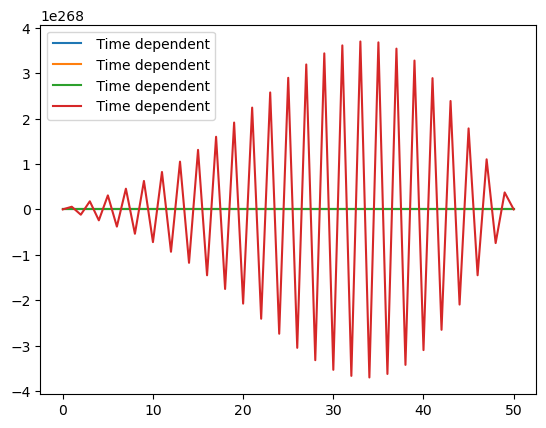

In [5]:
y_input = np.linspace(0,1,50)
time_show = [0.001, 0.01, 0.1, 1] 
dif.time_dependent(t = 1,time_list = time_show)
for d in dif.data:
    text = f" Time dependent"
    plt.plot(d[::-1,1],label=text)
    plt.legend()
plt.show()

### F

F. (1 point) Plot the results, show the 2D domain, with a color representing the
concentration at each point. Make a plot of the state of the system at several times:
t = {0, 0.001, 0.01, 0.1, and 1}.

In [2]:
test = SimulationGrid(50)
data, times = test.diffusion_iteration(1,10)
print(len(data))
print(times)
print(len(data[0][:,0][::-1]))
plt.imshow(data[-1])

AttributeError: 'SimulationGrid' object has no attribute 'diffusion_iteration'

### G

1 point) Make an animated plot of the time dependent diﬀusion equation until
equilibrium

### H

(1 point) Implement the Jacobi iteration, the Gauss-Seidel method and SOR.
Try N = 50. Test the methods by comparing the result to the analytical result in
eq. (5), i.e. the linear dependence of the concentration on y

In [ ]:
N = 50
dif = SimulationGrid(50)

#### Analytical

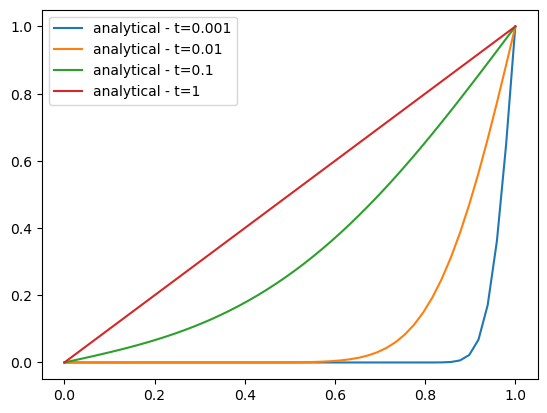

In [11]:
y_input = np.linspace(0,1,50)
time_show = [0.001, 0.01, 0.1, 1] 

for t in time_show:
    result = dif.c_analytical(t)
    text = f"analytical - t={t}"
    plt.plot(y_input,result,label=text)
    plt.legend()
plt.show()

#### Jacobi

243


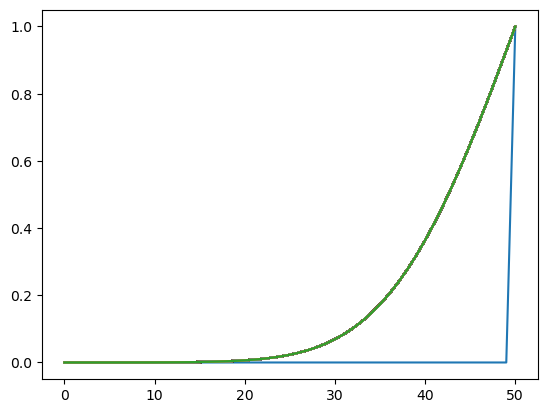

In [8]:
dif.time_independent(jacobi,stop = 0.001, store_step = 1)
print(len(dif.data))
for i,d in enumerate(dif.data):
    text = f"Jacobi"
    plt.plot(d[::-1,1], label = text)
plt.show()

#### Gauss-Seidel

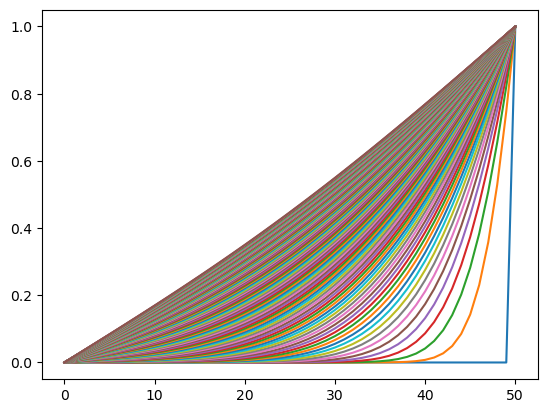

In [9]:
dif.time_independent(gauss_seidel, stop = 0.0001)
for d in dif.data:
    text = f"Gauss-seidel"
#     print(d[::-1,1])
    plt.plot(d[::-1,1],label=text)
    #plt.legend()
plt.show()

#### SOR

c:\Users\joann\OneDrive\Escritorio\Intro\Scientific-Computing\models\methods.py:88: RuntimeWarning: overflow encountered in scalar add
  C[i,-1] = w*(C[i+1,-1] + C[i-1,-1] + C[i,1] + C[i,-2]) + (1-w)*C[i,-1]
c:\Users\joann\OneDrive\Escritorio\Intro\Scientific-Computing\models\methods.py:85: RuntimeWarning: overflow encountered in scalar add
  C[i,0] = w*(C[i+1,0] + C[i-1,0] + C[i,1] + C[i,-2]) + (1-w)*C[i,0]


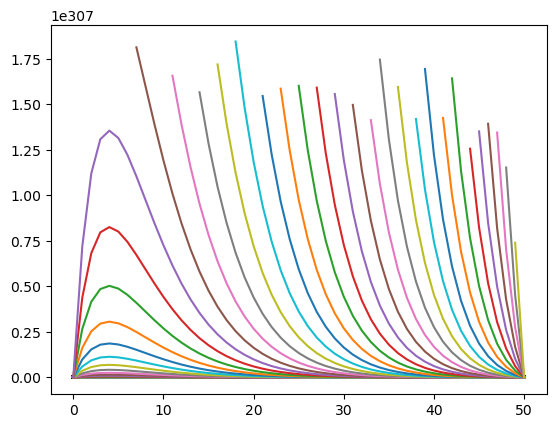

In [10]:
dif.time_independent(sor,w =1/3, stop = 0.001, store_step = 1)
for d in dif.data:
    text = f"Sor"
#     print(d[::-1,1])
    plt.plot(d[::-1,1],label=text)
    #plt.legend()
plt.show()

### I

In [19]:
stop_criteria = np.linspace(0.1, 0.00001, num=20, endpoint=True)
print(stop_criteria)

[1.00000000e-01 9.47373684e-02 8.94747368e-02 8.42121053e-02
 7.89494737e-02 7.36868421e-02 6.84242105e-02 6.31615789e-02
 5.78989474e-02 5.26363158e-02 4.73736842e-02 4.21110526e-02
 3.68484211e-02 3.15857895e-02 2.63231579e-02 2.10605263e-02
 1.57978947e-02 1.05352632e-02 5.27263158e-03 1.00000000e-05]


#### Jacobi

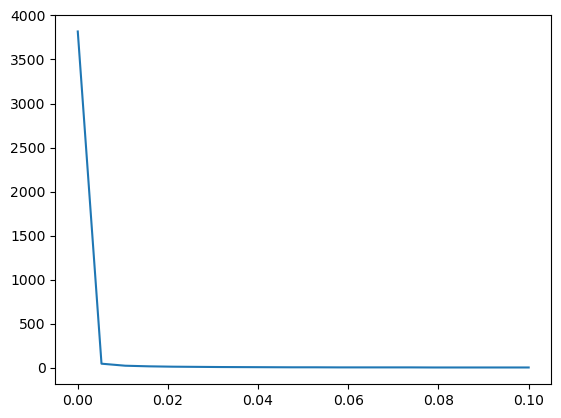

In [23]:
last_iteration= []
for delta in stop_criteria:
        dif.time_independent(jacobi,stop = delta)
        last_iteration.append(dif.iterations[-1])

plt.plot(stop_criteria, last_iteration)        
plt.plot(last_iteration, stop_criteria)
plt.x

#### Gauss

In [ ]:
dif.time_independent(jacobi,stop = 0.00001)
dif.time_independent(gauss_seidel, stop = 0.0001)
dif.time_independent(sor,w =1/3, stop = 0.001, store_step = 1)

#### SOR

### J

In [ ]:
ws = np.linspace(1.7,2,20)
